# Figure 3: UMAP Projection by Simulation

This notebook generates Figure 3 showing the UMAP embedding of normalized star formation histories.

The figure shows:
1. Individual simulation panels showing each simulation's UMAP projection
2. Combined view with all simulations
3. Sample SFH insets showing example star formation histories
4. Zoom simulations overlaid on UMAP projection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import pickle

# Add src to path
sys.path.append('../src')

from utils.analysis import (sim_name, zoom_name, 
                           colors, zoom_colors, zoom_markers, times)
from utils.plotting import draw_grid_A, draw_battleship_grid

# LaTeX font setup
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

%matplotlib inline

## Load Processed Data and UMAP Embeddings

In [2]:
# Load processed simulation data
with open('../data/sim_data_processed.pkl', 'rb') as f:
    sim_data = pickle.load(f)

# Load UMAP embeddings
combined_labels = np.load('../data/combined_labels.npy')
embedding = np.load('../data/umap_embedding.npy')

# Reconstruct UMAP embeddings by simulation
for i, sim in enumerate(sim_name):
    if sim_data[sim] is not None:
        sim_mask = combined_labels == i
        sim_data[sim]['umap'] = embedding[sim_mask]

# Load combined normalized SFHs for inset plots
combined_sfh = np.load('../data/combined_sfh.npy')
for i, sim in enumerate(sim_name):
    if sim_data[sim] is not None:
        sim_mask = combined_labels == i
        sim_data[sim]['sfh'] = combined_sfh[sim_mask]

print("Loaded UMAP embeddings and normalized SFHs:")
for sim in sim_name:
    if sim_data[sim] is not None:
        print(f"{sim:>15s}: {sim_data[sim]['umap'].shape[0]:>8,d} galaxies, UMAP shape: {sim_data[sim]['umap'].shape}")

Loaded UMAP embeddings and normalized SFHs:
          EAGLE:    7,445 galaxies, UMAP shape: (7445, 2)
      Illustris:   19,354 galaxies, UMAP shape: (19354, 2)
   IllustrisTNG:   12,220 galaxies, UMAP shape: (12220, 2)
         Mufasa:    1,900 galaxies, UMAP shape: (1900, 2)
          Simba:    1,982 galaxies, UMAP shape: (1982, 2)
         SC-SAM:   12,821 galaxies, UMAP shape: (12821, 2)
UniverseMachine:    7,361 galaxies, UMAP shape: (7361, 2)


## Load Zoom Simulation Data

In [3]:
# Load zoom simulation data
with open('../data/zoom_data_processed.pkl', 'rb') as f:
    zoom_data = pickle.load(f)

# Load zoom UMAP embeddings
try:
    zoom_embedding = np.load('../data/zoom_umap_embedding.npy')
    zoom_labels = np.load('../data/zoom_labels.npy')
    
    # Reconstruct zoom embeddings by simulation (matching Figure 2 approach)
    for i, zoom in enumerate(zoom_name):
        if zoom_data[zoom] is not None:
            zoom_mask = zoom_labels == i
            zoom_data[zoom]['umap'] = zoom_embedding[zoom_mask]
    
    print("\\nLoaded zoom simulation UMAP embeddings:")
    for zoom in zoom_name:
        if zoom_data[zoom] is not None:
            print(f"{zoom:>15s}: {zoom_data[zoom]['umap'].shape[0]:>8,d} galaxies, UMAP shape: {zoom_data[zoom]['umap'].shape}")
except FileNotFoundError:
    print("\\nNo zoom UMAP embeddings found")
    for zoom in zoom_name:
        if zoom_data[zoom] is not None:
            zoom_data[zoom]['umap'] = None

\nLoaded zoom simulation UMAP embeddings:
         FIRE-2:       22 galaxies, UMAP shape: (22, 2)
            g14:        8 galaxies, UMAP shape: (8, 2)
      Marvel_JL:        5 galaxies, UMAP shape: (5, 2)


## Generate Figure 3A: UMAP Projection by Simulation

Create multi-panel figure showing individual simulation UMAP projections plus combined view with example SFH insets.

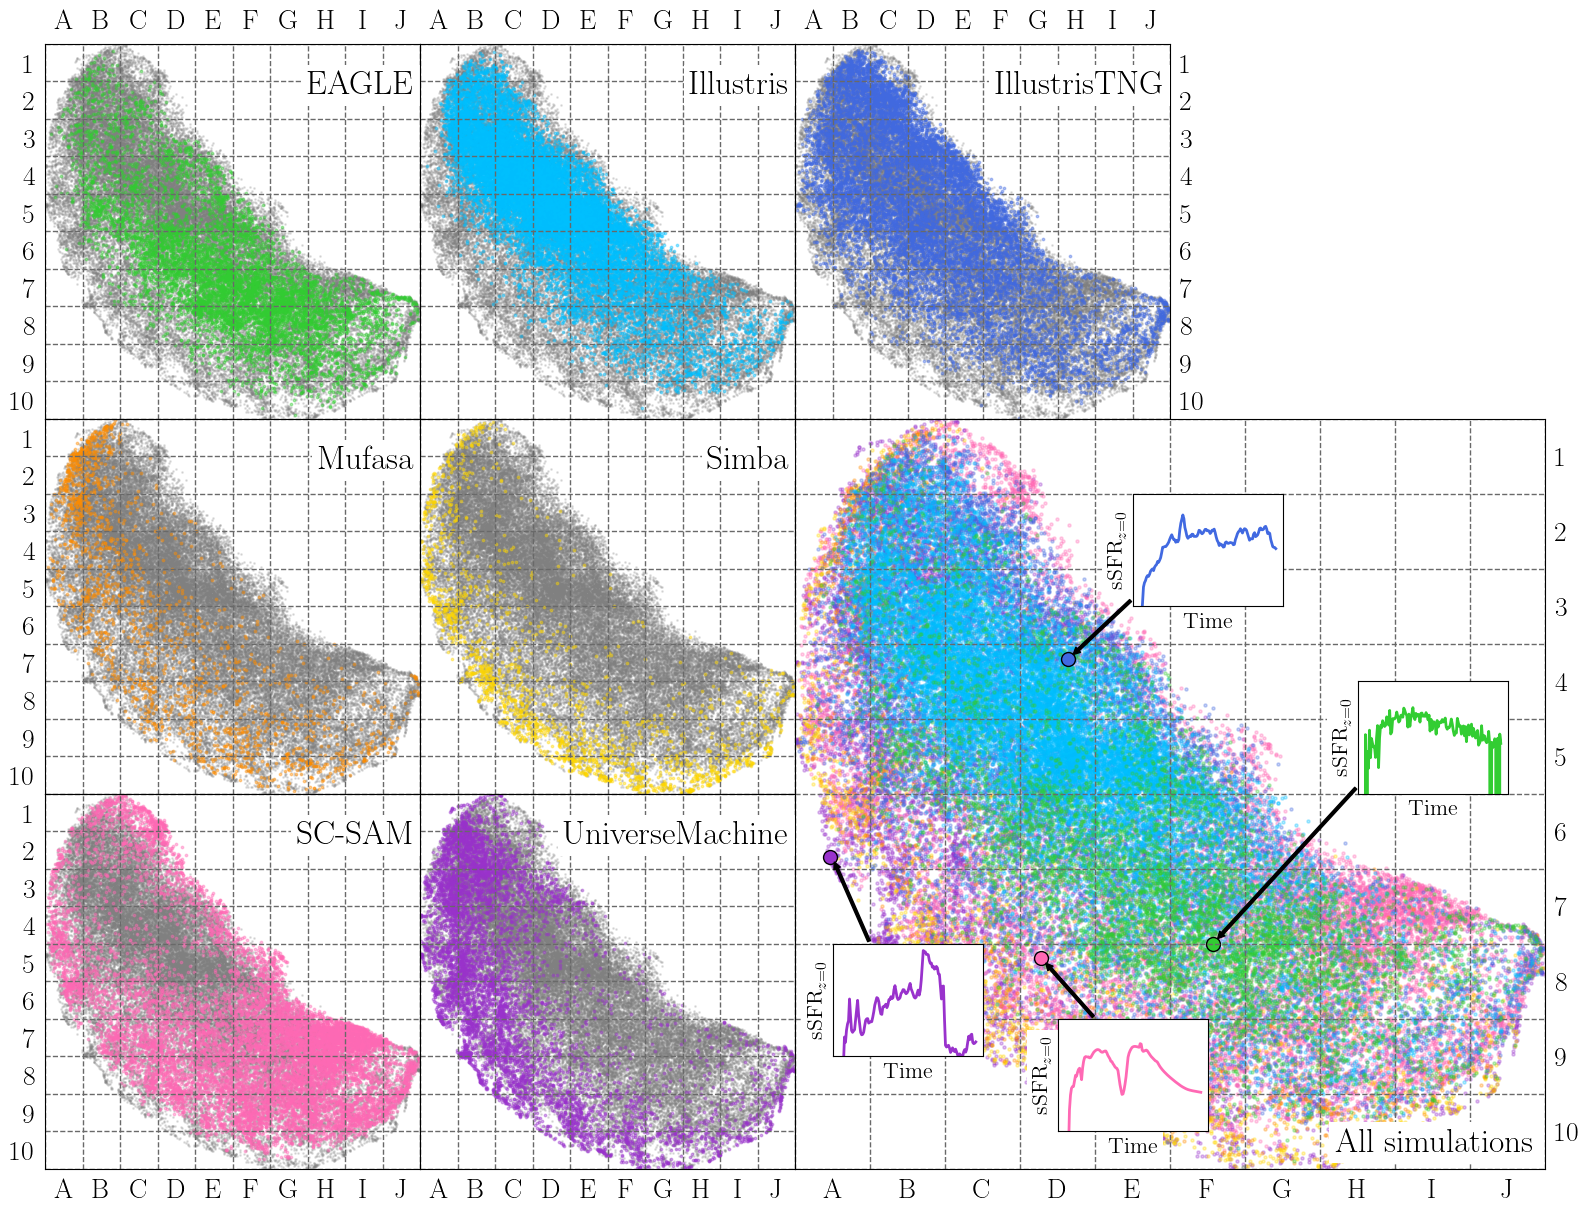

Figure 3A (UMAP projection by simulation) generated successfully!


In [4]:
# Create the multi-panel figure using draw_grid_A
ax = draw_grid_A(xlim=[0,10], ylim=[0,10], umap=True)

# Plot individual simulations
for sim in sim_name:
    # Plot other sims in background (grey)
    for i in sim_name:
        if i == sim:
            continue
        else:
            ax[sim].scatter(sim_data[i]['umap'][:,0], sim_data[i]['umap'][:,1], 
                           s=1, c='grey', alpha=0.2)
    
    # Plot this sim in foreground (colored)
    ax[sim].scatter(sim_data[sim]['umap'][:,0], sim_data[sim]['umap'][:,1], 
                   s=3, c=colors[sim], alpha=0.4)
    
    # Add simulation name
    ax[sim].text(9.85, 8.5, sim, ha='right', va='bottom', fontsize=24,
                bbox=dict(facecolor='white', edgecolor='white', linewidth=0))

# Plot all simulations in combined panel
for sim in sim_name[::-1]:
    ax['large'].scatter(sim_data[sim]['umap'][:,0], sim_data[sim]['umap'][:,1], 
                       s=5, c=colors[sim], alpha=0.3)

ax['large'].text(9.85, 0.15, 'All simulations', ha='right', va='bottom', fontsize=24,
                bbox=dict(facecolor='white', edgecolor='white', linewidth=0))

# Pick out 4 example SFHs
idx = {}
idx['SC-SAM'] = 27
idx['EAGLE'] = 25
idx['IllustrisTNG'] = 201
idx['UniverseMachine'] = 76

ex = {}
for sim in idx.keys():
    ex[sim] = sim_data[sim]['sfh'][idx[sim]]
    ax['large'].scatter(sim_data[sim]['umap'][idx[sim],0], sim_data[sim]['umap'][idx[sim],1], 
                       s=100, c=colors[sim], ec='k')

# Add inset plots [x0, y0, width, height] where x0,y0 are bottom left of inset axes
ins1 = ax['large'].inset_axes([0.35,0.05,0.2,0.15], facecolor='white', zorder=21) # SC-SAM pt SFH
ins2 = ax['large'].inset_axes([0.75,0.5,0.2,0.15], facecolor='white', zorder=21) # Eagle pt SFH
ins3 = ax['large'].inset_axes([0.45,0.75,0.2,0.15], facecolor='white', zorder=21) # TNG pt SFH
ins4 = ax['large'].inset_axes([0.05,0.15,0.2,0.15], facecolor='white', zorder=21) # UM pt SFH
ins = [ins1, ins2, ins3, ins4]

for i, sim in enumerate(ex.keys()):
    ins[i].patch.set_color('w')
    
    ins[i].semilogy(times, ex[sim], c=colors[sim], lw=2)
    
    ins[i].tick_params(which='both', left=False, right=False, top=False, bottom=False,
                      labelleft=False, labelright=False, labeltop=False, labelbottom=False)
    ins[i].set_ylim(10**-12.1, 10**-8.9)
    ins[i].set_xlabel('Time', fontsize=16, bbox=dict(facecolor='white', edgecolor='none'))
    ins[i].set_ylabel(r'${\rm sSFR}_{z=0}$', fontsize=16, bbox=dict(facecolor='white', edgecolor='none'))

# Add arrows connecting insets to points
s = 'SC-SAM'
ax['large'].annotate("",
          xy=(sim_data[s]['umap'][idx[s], 0] + 0.04, sim_data[s]['umap'][idx[s], 1] - 0.04), xycoords='data',
          xytext=(0.4, 0.2), textcoords='axes fraction',
          size=10, va="center", ha="center",
          arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.", color='k'), 
          zorder=30)

s = 'EAGLE'
ax['large'].annotate("",
          xy=(sim_data[s]['umap'][idx[s], 0] + 0.04, sim_data[s]['umap'][idx[s], 1] + 0.04), xycoords='data',
          xytext=(0.75, 0.51), textcoords='axes fraction',
          size=10, va="center", ha="center",
          arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.", color='k'), 
          zorder=30)

s = 'IllustrisTNG'
ax['large'].annotate("",
          xy=(sim_data[s]['umap'][idx[s], 0] + 0.04, sim_data[s]['umap'][idx[s], 1] + 0.04), xycoords='data',
          xytext=(0.45, 0.76), textcoords='axes fraction',
          size=10, va="center", ha="center",
          arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.", color='k'), 
          zorder=30)

s = 'UniverseMachine'
ax['large'].annotate("",
          xy=(sim_data[s]['umap'][idx[s], 0] + 0.04, sim_data[s]['umap'][idx[s], 1] - 0.04), xycoords='data',
          xytext=(0.1, 0.3), textcoords='axes fraction',
          size=10, va="center", ha="center",
          arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.", color='k'), 
          zorder=30)

# Save figure to figures directory
plt.savefig('../figures/umap_projection.png', bbox_inches='tight', dpi=300)
plt.savefig('../figures/umap_projection.pdf', bbox_inches='tight')

plt.show()

print("Figure 3A (UMAP projection by simulation) generated successfully!")

## Generate Figure 3B: UMAP with Zoom Simulations

Create single panel showing zoom simulation overlays on the UMAP projection.

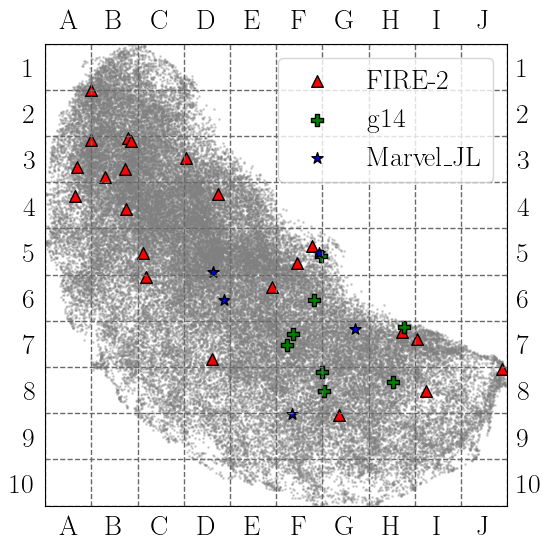

Figure 3B (UMAP with zoom simulations) generated successfully!


In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot existing UMAP in background
for sim in sim_name:
    ax.scatter(sim_data[sim]['umap'][:,0], sim_data[sim]['umap'][:,1], 
              s=1, c='grey', alpha=0.3)

# Draw battleship grid
draw_battleship_grid(ax)
    
# Plot zoom points over top
for zoom in zoom_name:
    if zoom_data[zoom] is not None and zoom_data[zoom]['umap'] is not None:
        plt.scatter(zoom_data[zoom]['umap'][:,0], zoom_data[zoom]['umap'][:,1], 
                   marker=zoom_markers[zoom], s=70, c=zoom_colors[zoom], ec='k',
                   label=zoom)

plt.legend(fontsize=20)

# Save figure to figures directory
plt.savefig('../figures/umap_projection_zooms.png', bbox_inches='tight', dpi=300)
plt.savefig('../figures/umap_projection_zooms.pdf', bbox_inches='tight')

plt.show()

print("Figure 3B (UMAP with zoom simulations) generated successfully!")

In [6]:
print("\nFigures saved to:")
print("- ../figures/umap_projection.png")
print("- ../figures/umap_projection.pdf")
print("- ../figures/umap_projection_zooms.png")
print("- ../figures/umap_projection_zooms.pdf")
print("\nFigure 3 shows UMAP projections of normalized star formation histories,")
print("with individual simulation panels, combined view with example SFH insets,")
print("and zoom simulation overlays.")


Figures saved to:
- ../figures/umap_projection.png
- ../figures/umap_projection.pdf
- ../figures/umap_projection_zooms.png
- ../figures/umap_projection_zooms.pdf

Figure 3 shows UMAP projections of normalized star formation histories,
with individual simulation panels, combined view with example SFH insets,
and zoom simulation overlays.
